<a href="https://colab.research.google.com/github/adam01see/Habit-tracker-app/blob/main/CNN_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing tensorflow
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.19.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show(close=None, block=None)>

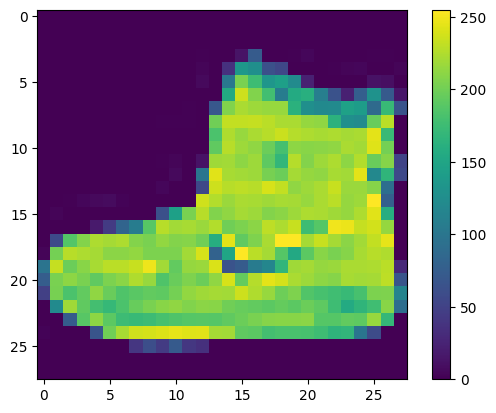

In [5]:
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show


In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

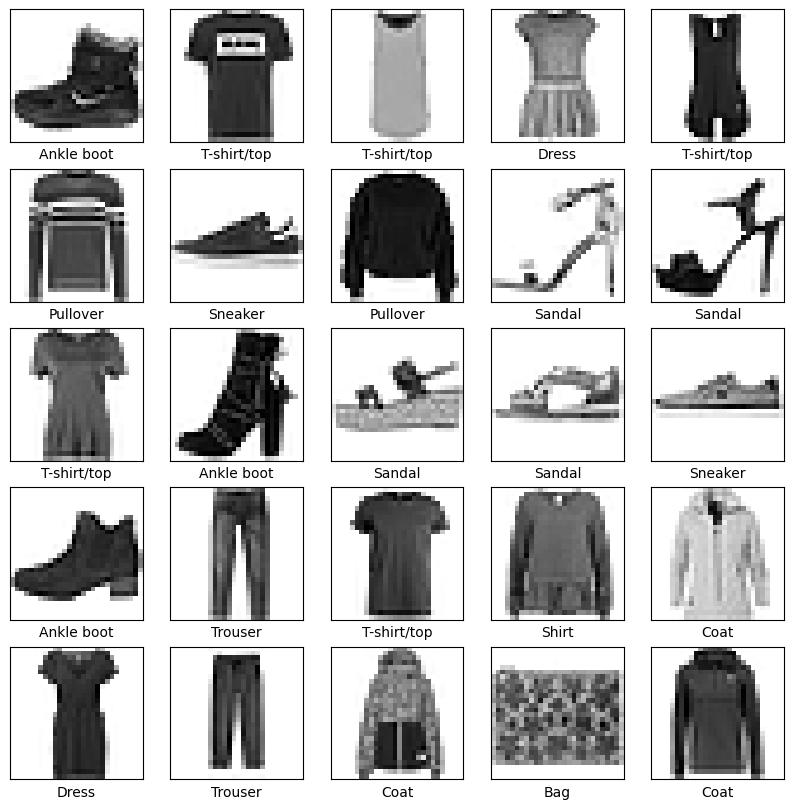

In [30]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

In [8]:
model = tf.keras.Sequential ([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
import time

start = time.time()
model.fit(train_images, train_labels, epochs=10)
end = time.time()

rf_training_time = end - start
print(f"RF training time: {rf_training_time:.2f} seconds")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.7713 - loss: 0.6332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.8866 - loss: 0.3108
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9072 - loss: 0.2577
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9141 - loss: 0.2277
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9283 - loss: 0.1933
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9366 - loss: 0.1701
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9423 - loss: 0.1542
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9487 - loss: 0.1352
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9551 - loss: 0.1165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9630 - loss: 0.1007
RF training time: 635.55 seconds


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - 9ms/step - accuracy: 0.9129 - loss: 0.2766


In [12]:
probability_model = tf.keras.Sequential([model, ])

In [13]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [15]:
y_prob = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [24]:
y_train_prob = model.predict(train_images)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step


In [25]:
import numpy as np

y_pred = np.argmax(y_prob, axis=1)
y_train_pred = np.argmax(y_train_prob, axis=1)

In [19]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(
    test_labels,
    y_pred,
    target_names=class_names,
    output_dict=True
)

df_metrics = pd.DataFrame(report).transpose()
df_metrics[["precision", "recall", "f1-score"]]

,precision,recall,f1-score
T-shirt/top,0.887061,0.8090,0.846234
Trouser,0.988967,0.9860,0.987481
Pullover,0.868687,0.8600,0.864322
Dress,0.940299,0.8820,0.910217
Coat,0.872692,0.8980,0.885165
Sandal,0.986748,0.9680,0.977284
Shirt,0.718222,0.8080,0.760471
Sneaker,0.954769,0.9710,0.962816
Bag,0.974975,0.9740,0.974487
Ankle boot,0.961462,0.9730,0.967197


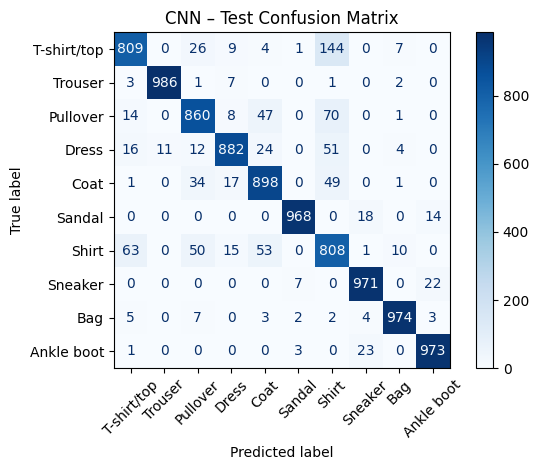

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

cm_test = confusion_matrix(test_labels, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=class_names
)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("CNN – Test Confusion Matrix")
plt.tight_layout()
plt.show()

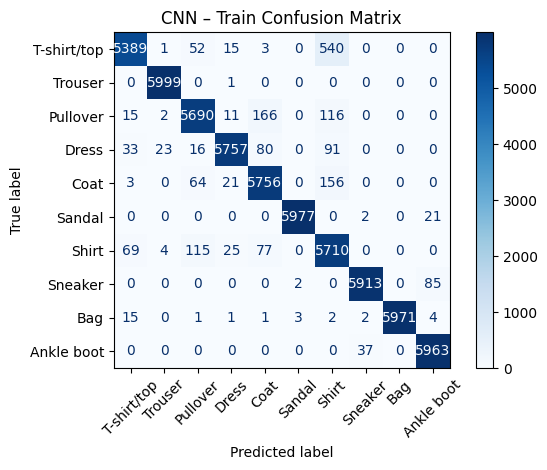

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

cm_test = confusion_matrix(train_labels, y_train_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=class_names
)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("CNN – Train Confusion Matrix")
plt.tight_layout()
plt.show()